In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.model_selection import KFold, StratifiedKFold
from imblearn.over_sampling import SMOTE

# Train test counter

In [9]:
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.dayofyear
df = df.drop(df.index[-1])
# replacement_dict = {'Non': 0, 'NPF': 1, 'undefined': 2}
# df['day.type'] = df['day.type'].replace(replacement_dict)

X = df.drop(columns=["day.type"])
y = df["day.type"]
value_counts = y.value_counts()
# print(y)
smote = SMOTE(sampling_strategy='auto')
X, y = smote.fit_resample(X, y)
value_counts = y.value_counts()
# print(y)

outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
y_train_value_counts = y_train.value_counts()
y_test_value_counts = y_test.value_counts()
print(y_train_value_counts)
print('break')
print(y_test_value_counts)

day.type
Non          68
NPF          67
undefined    67
Name: count, dtype: int64
break
day.type
NPF          17
undefined    17
Non          16
Name: count, dtype: int64


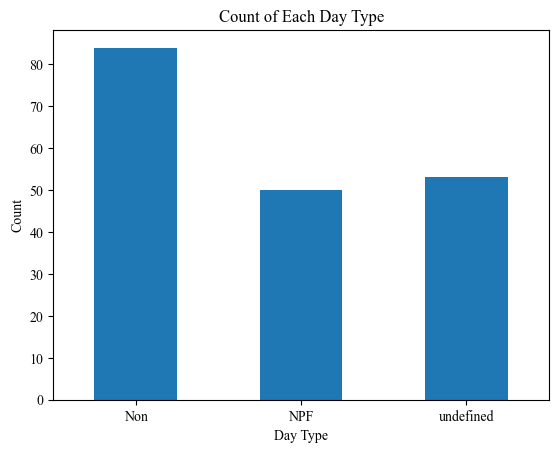

In [13]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofyear
df = df.drop(df.index[-1])
df_temp = df[['day.type', 'month']].copy()
grouped = df.groupby('month')['day.type'].value_counts().unstack(fill_value=0)
grouped['Percentage NPF'] = (grouped['NPF'] / grouped.sum(axis=1)) * 100

plt.rcParams['font.family'] = 'Times New Roman'

grouped['Percentage NPF'].plot(kind='bar')
day_type_counts = df['day.type'].value_counts()

day_type_counts.plot(kind='bar')
plt.title('Count of Each Day Type')
plt.xlabel('Day Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\count_day.type.png', dpi=300)

Day.type count

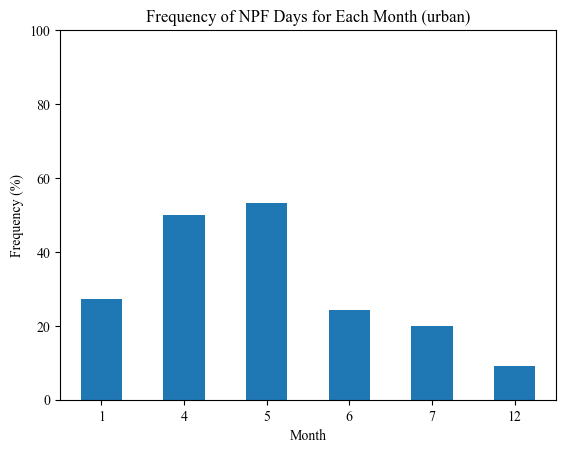

In [14]:
# Read dataset
df = pd.read_csv(r'C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\in_progress\\output_combined.csv')
# Prep the dataset
df = df.dropna()
df = df.drop(df.columns[df.columns.str.contains('Unnamed')], axis=1)
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.dayofyear
df = df.drop(df.index[-1])
df_temp = df[['day.type', 'month']].copy()
grouped = df.groupby('month')['day.type'].value_counts().unstack(fill_value=0)
grouped['Percentage NPF'] = (grouped['NPF'] / grouped.sum(axis=1)) * 100

plt.rcParams['font.family'] = 'Times New Roman'

grouped['Percentage NPF'].plot(kind='bar')
plt.title('Frequency of NPF Days for Each Month (urban)')
plt.xlabel('Month')
plt.ylabel('Frequency (%)')
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Set y-axis limit to ensure percentages are within range
plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\count_day.type_month.png', dpi=300)

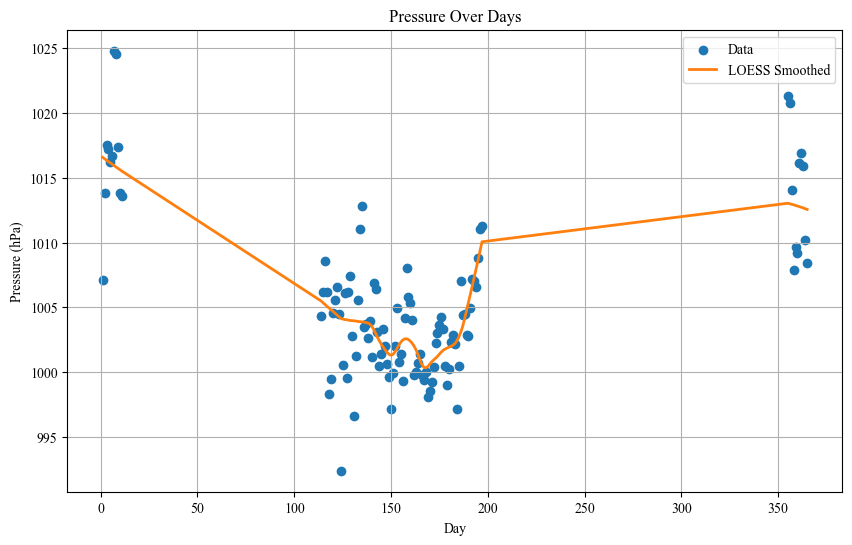

In [15]:
grouped_data = df.groupby('day')['pressure'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Pressure Over Days')
plt.xlabel('Day')
plt.ylabel('Pressure (hPa)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\P_day.png', dpi=300)
plt.show()

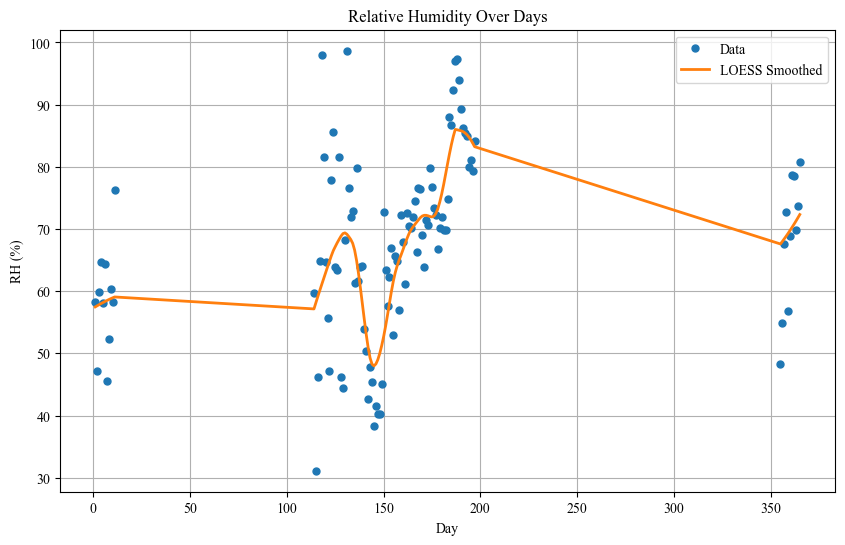

In [16]:
grouped_data = df.groupby('day')['RH'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

plt.plot(grouped_data.index, grouped_data.values, marker='o', color='tab:blue', linestyle='', markersize=5, label='Data')
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Relative Humidity Over Days')
plt.xlabel('Day')
plt.ylabel('RH (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend()

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\RH_day_smooth.png', dpi=300)
plt.show()

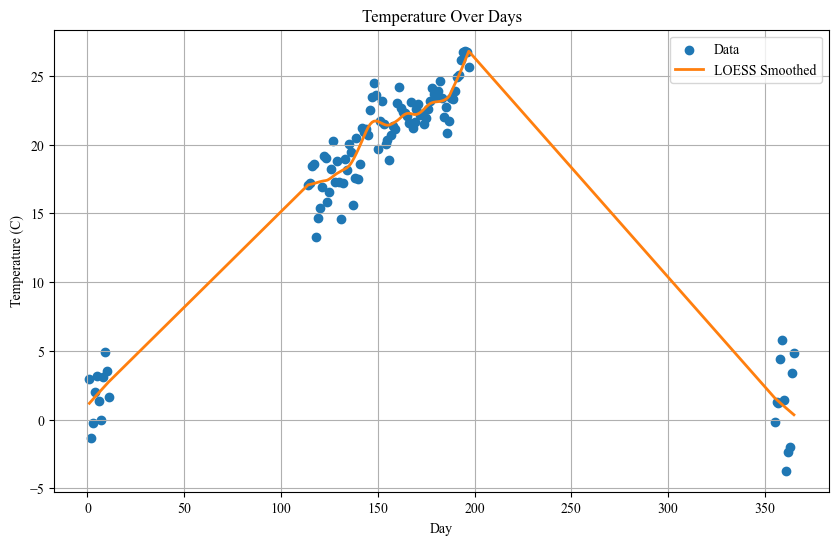

In [17]:
grouped_data = df.groupby('day')['temperature'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Temperature Over Days')
plt.xlabel('Day')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\T_day_smooth.png', dpi=300)
plt.show()

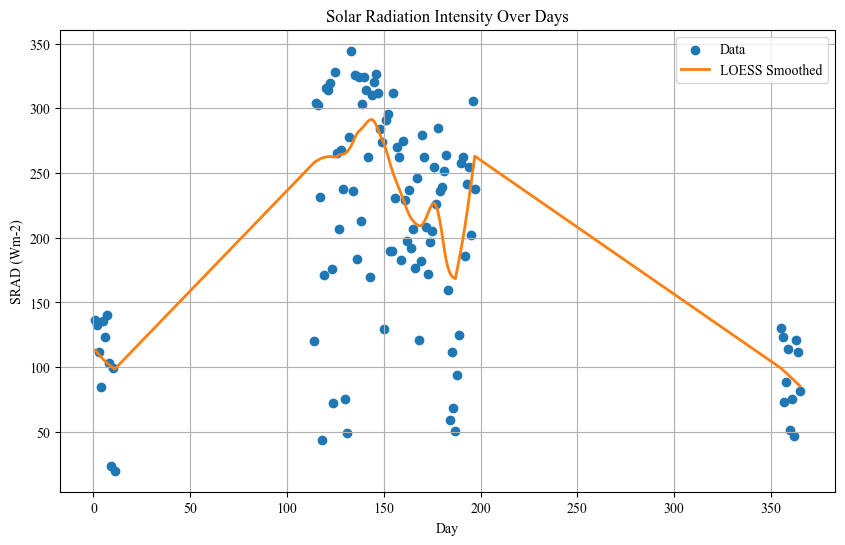

In [18]:
grouped_data = df.groupby('day')['SRAD'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('Solar Radiation Intensity Over Days')
plt.xlabel('Day')
plt.ylabel('SRAD (Wm-2)')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\SRAD_day_smooth.png', dpi=300)
plt.show()

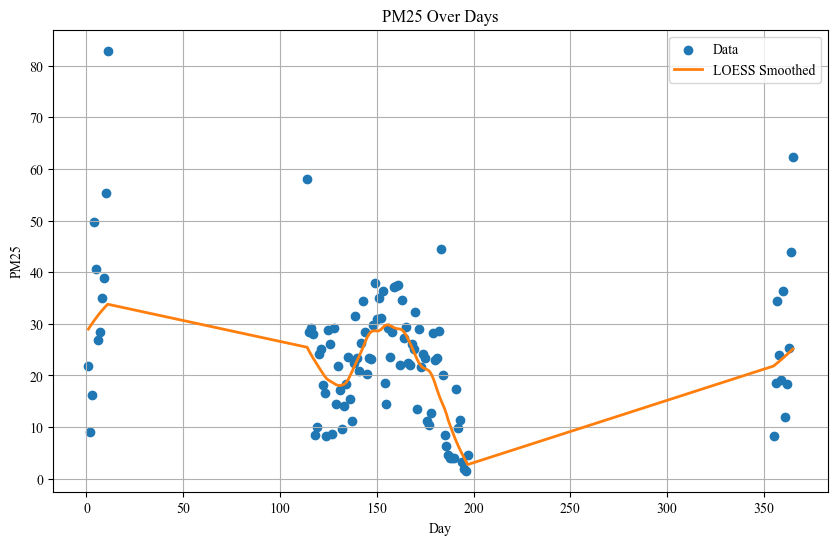

In [21]:
grouped_data = df.groupby('day')['pm25'].mean()
plt.figure(figsize=(10, 6))
plt.rcParams['font.family'] = 'Times New Roman'

# Plot the scatter plot
plt.scatter(grouped_data.index, grouped_data, color='tab:blue', label='Data')

# Smooth the data using LOESS
smoothed = lowess(grouped_data.values, grouped_data.index, frac=0.2)

# Plot the LOESS smoothed line
plt.plot(smoothed[:,0], smoothed[:,1], color='tab:orange', linewidth=2, label='LOESS Smoothed')

plt.title('PM25 Over Days')
plt.xlabel('Day')
plt.ylabel('PM25')
plt.xticks(rotation=0)
plt.legend()
plt.grid(True)

plt.savefig('C:\\Users\\Masloriy\\Desktop\\NPF_project_urban\\NPF_project_urban\\png\\PM25_day_smooth.png', dpi=300)
plt.show()